In [221]:
import os
import json
from pprint import pp
import matplotlib.pyplot as plt
import seaborn as sns

In [449]:
#os.listdir('results')
os.listdir(os.path.join(os.getcwd(), 'results'))

['qwen2.5-1.5b-it_gguf_q3_k_m_ollama_pqa_labeled',
 'llama3-med_gguf_q6_k_ollama_pqa_labeled',
 'gemma3-12b-it_gguf_q5_k_m_ollama_pqa_labeled',
 'qwen2.5-1.5b-it_gguf_q4_k_m_ollama_pqa_labeled',
 'biomistral-7b_gguf_q6_k_ollama_pqa_labeled',
 'biomistral-7b_gguf_q4_k_m_ollama_pqa_labeled',
 'qwen2.5-0.5b-it_gguf_q5_k_m_ollama_pqa_labeled',
 'qwen2.5-0.5b-it_gguf_q2_k_ollama_pqa_labeled',
 'gemma3-1b-it_gguf_q8_0_ollama_pqa_labeled',
 'qwen2.5-3b-it_gguf_q5_k_m_ollama_pqa_labeled',
 'biomistral-7b_gguf_q2_k_ollama_pqa_labeled',
 'qwen2.5-3b-it_gguf_q2_k_ollama_pqa_labeled',
 'llama3-med_gguf_q4_k_m_ollama_pqa_labeled',
 'biomistral-7b_gguf_q8_0_ollama_pqa_labeled',
 'qwen2.5-1.5b-it_gguf_q5_k_m_ollama_pqa_labeled',
 'gemma3-4b-it_gguf_q2_k_ollama_pqa_labeled',
 'qwen2.5-3b-it_gguf_q4_k_m_ollama_pqa_labeled',
 'qwen2.5-7b-it_gguf_q6_k_ollama_pqa_labeled',
 'qwen2.5-0.5b-it_gguf_q6_k_ollama_pqa_labeled',
 'qwen2.5-7b-it_gguf_q5_k_m_ollama_pqa_labeled',
 'llama3-med_gguf_q3_k_m_ollama_pqa_

**Goal:** Process *.json files from model results folders, and produce plots

In [164]:
print(f"# Results folders to process: {len(os.listdir('results'))}")

# Results folders to process: 53


In [34]:
model_keys = list(set([r.split('-')[0] for r in os.listdir('results')]))
model_idxs = {m:[] for m in model_keys}
print(m_idxs_dict)

{'biomistral': [], 'llama3': [], 'gemma3': [], 'qwen2.5': []}


In [441]:
model_families = list(set([r.split('-')[0] for r in os.listdir('results')]))
family_x_idx_pairs=[(r.split('-')[0], idx) for idx, r in enumerate(os.listdir('results'))]
models = {m:[] for m in model_families}
for (m,i) in family_x_idx_pairs:
    models[m].append(os.listdir('results')[i])

In [442]:
models

{'biomistral': ['biomistral-7b_gguf_q6_k_ollama_pqa_labeled',
  'biomistral-7b_gguf_q4_k_m_ollama_pqa_labeled',
  'biomistral-7b_gguf_q2_k_ollama_pqa_labeled',
  'biomistral-7b_gguf_q8_0_ollama_pqa_labeled',
  'biomistral-7b_gguf_q5_k_m_ollama_pqa_labeled',
  'biomistral-7b_gguf_q3_k_m_ollama_pqa_labeled'],
 'llama3': ['llama3-med_gguf_q6_k_ollama_pqa_labeled',
  'llama3-med_gguf_q4_k_m_ollama_pqa_labeled',
  'llama3-med_gguf_q3_k_m_ollama_pqa_labeled',
  'llama3-med_gguf_q8_0_ollama_pqa_labeled',
  'llama3-med_gguf_q5_k_m_ollama_pqa_labeled'],
 'gemma3': ['gemma3-12b-it_gguf_q5_k_m_ollama_pqa_labeled',
  'gemma3-1b-it_gguf_q8_0_ollama_pqa_labeled',
  'gemma3-4b-it_gguf_q2_k_ollama_pqa_labeled',
  'gemma3-4b-it_gguf_q4_k_m_ollama_pqa_labeled',
  'gemma3-4b-it_gguf_q5_k_m_ollama_pqa_labeled',
  'gemma3-1b-it_gguf_q6_k_ollama_pqa_labeled',
  'gemma3-12b-it_gguf_q2_k_ollama_pqa_labeled',
  'gemma3-12b-it_gguf_q4_k_m_ollama_pqa_labeled',
  'gemma3-4b-it_gguf_q3_k_m_ollama_pqa_labeled',
  '

In [93]:
family_x_idx_pairs

[('qwen2.5', 0),
 ('llama3', 1),
 ('gemma3', 2),
 ('qwen2.5', 3),
 ('biomistral', 4),
 ('biomistral', 5),
 ('qwen2.5', 6),
 ('qwen2.5', 7),
 ('gemma3', 8),
 ('qwen2.5', 9),
 ('biomistral', 10),
 ('qwen2.5', 11),
 ('llama3', 12),
 ('biomistral', 13),
 ('qwen2.5', 14),
 ('gemma3', 15),
 ('qwen2.5', 16),
 ('qwen2.5', 17),
 ('qwen2.5', 18),
 ('qwen2.5', 19),
 ('llama3', 20),
 ('qwen2.5', 21),
 ('qwen2.5', 22),
 ('gemma3', 23),
 ('gemma3', 24),
 ('llama3', 25),
 ('gemma3', 26),
 ('qwen2.5', 27),
 ('gemma3', 28),
 ('gemma3', 29),
 ('gemma3', 30),
 ('gemma3', 31),
 ('qwen2.5', 32),
 ('qwen2.5', 33),
 ('qwen2.5', 34),
 ('gemma3', 35),
 ('llama3', 36),
 ('qwen2.5', 37),
 ('biomistral', 38),
 ('qwen2.5', 39),
 ('qwen2.5', 40),
 ('gemma3', 41),
 ('gemma3', 42),
 ('qwen2.5', 43),
 ('qwen2.5', 44),
 ('gemma3', 45),
 ('gemma3', 46),
 ('gemma3', 47),
 ('gemma3', 48),
 ('qwen2.5', 49),
 ('qwen2.5', 50),
 ('biomistral', 51),
 ('gemma3', 52)]

In [94]:
models

{'biomistral': ['biomistral-7b_gguf_q6_k_ollama_pqa_labeled',
  'biomistral-7b_gguf_q4_k_m_ollama_pqa_labeled',
  'biomistral-7b_gguf_q2_k_ollama_pqa_labeled',
  'biomistral-7b_gguf_q8_0_ollama_pqa_labeled',
  'biomistral-7b_gguf_q5_k_m_ollama_pqa_labeled',
  'biomistral-7b_gguf_q3_k_m_ollama_pqa_labeled'],
 'llama3': ['llama3-med_gguf_q6_k_ollama_pqa_labeled',
  'llama3-med_gguf_q4_k_m_ollama_pqa_labeled',
  'llama3-med_gguf_q3_k_m_ollama_pqa_labeled',
  'llama3-med_gguf_q8_0_ollama_pqa_labeled',
  'llama3-med_gguf_q5_k_m_ollama_pqa_labeled'],
 'gemma3': ['gemma3-12b-it_gguf_q5_k_m_ollama_pqa_labeled',
  'gemma3-1b-it_gguf_q8_0_ollama_pqa_labeled',
  'gemma3-4b-it_gguf_q2_k_ollama_pqa_labeled',
  'gemma3-4b-it_gguf_q4_k_m_ollama_pqa_labeled',
  'gemma3-4b-it_gguf_q5_k_m_ollama_pqa_labeled',
  'gemma3-1b-it_gguf_q6_k_ollama_pqa_labeled',
  'gemma3-12b-it_gguf_q2_k_ollama_pqa_labeled',
  'gemma3-12b-it_gguf_q4_k_m_ollama_pqa_labeled',
  'gemma3-4b-it_gguf_q3_k_m_ollama_pqa_labeled',
  '

In [95]:
os.listdir(os.path.join('results',models['qwen2.5'][2]))#[0].split('.')

['results_qwen2.5-0.5b-it_gguf_q5_k_m_ollama_pqa_labeled.json',
 'valid_df_qwen2.5-0.5b-it_gguf_q5_k_m_ollama_pqa_labeled.csv']

In [455]:
model_families = list(set([r.split('-')[0] for r in os.listdir('results')]))
family_x_idx_pairs=[(r.split('-')[0], idx) for idx, r in enumerate(os.listdir('results'))]

# GOAL: transform models as follows: models={model_family:list_of_directories} -> {model_family:list_of_json_files}

# initialize models
models = {m:[] for m in model_families}
# add families as keys
for (m,i) in family_x_idx_pairs:
    models[m].append(os.listdir('results')[i])
# transform values : path to model folder -> path to json results file
for m in models.keys():
    # models[m]: list of folder names corresponding to the the model family m
    
    # get json files from each folder
    m_files = []
    for idx, folder in enumerate(models[m]):
        subfolder_files = os.listdir(os.path.join('results', models[m][idx])) # [*.csv, *.json]
        for file in subfolder_files:
            if 'json' in file:
                m_files.append(os.path.join('results',models[m][idx],file))
    models[m] = m_files

In [112]:
models

{'biomistral': ['results/biomistral-7b_gguf_q6_k_ollama_pqa_labeled/results_biomistral-7b_gguf_q6_k_ollama_pqa_labeled.json',
  'results/biomistral-7b_gguf_q4_k_m_ollama_pqa_labeled/results_biomistral-7b_gguf_q4_k_m_ollama_pqa_labeled.json',
  'results/biomistral-7b_gguf_q2_k_ollama_pqa_labeled/results_biomistral-7b_gguf_q2_k_ollama_pqa_labeled.json',
  'results/biomistral-7b_gguf_q8_0_ollama_pqa_labeled/results_biomistral-7b_gguf_q8_0_ollama_pqa_labeled.json',
  'results/biomistral-7b_gguf_q5_k_m_ollama_pqa_labeled/results_biomistral-7b_gguf_q5_k_m_ollama_pqa_labeled.json',
  'results/biomistral-7b_gguf_q3_k_m_ollama_pqa_labeled/results_biomistral-7b_gguf_q3_k_m_ollama_pqa_labeled.json'],
 'llama3': ['results/llama3-med_gguf_q6_k_ollama_pqa_labeled/results_llama3-med_gguf_q6_k_ollama_pqa_labeled.json',
  'results/llama3-med_gguf_q4_k_m_ollama_pqa_labeled/results_llama3-med_gguf_q4_k_m_ollama_pqa_labeled.json',
  'results/llama3-med_gguf_q3_k_m_ollama_pqa_labeled/results_llama3-med_ggu

In [483]:
print(list(models.keys()))
t = models['qwen2.5'][0] # test file
with open(t, 'r') as file:
    data = json.load(file)

['biomistral', 'llama3', 'gemma3', 'qwen2.5']


In [484]:
data['metrics']['gpu_report'].pop('util_logs')
data['metrics']['gpu_report'].pop('load_logs')
data['metrics']['gpu_report'].pop('mem_used_logs')
data['metrics']['gpu_report']

{'peak_gpu_load': 0.54,
 'peak_mem_util': 0.07514977858817401,
 'avg_load': 0.22647058823529412,
 'avg_util': 0.07223337368289333,
 'std_load': 0.09980026188444095,
 'std_util': 0.009617198803682902,
 'mem_total': 46068.0}

In [486]:
data['metrics']['latency_report'].pop('latencies')
data['metrics']['latency_report']

{'peak_latency': 2.1357100009918213,
 'min_latency': 0.06488871574401855,
 'avg_latency': 0.12413343167304992,
 'std_dev_latecy': 0.04766559847480271,
 'var_latency': 0.0022720092779611144,
 'total_exp_inference_time_sec': 248.26686334609985,
 'throughput_prompts_per_sec': 8.055847538589443}

In [487]:
b = os.listdir()

In [451]:
data.keys()

dict_keys(['experiment_name', 'semi-processed_results', 'metrics'])

In [488]:
print("Available metrics")
print("-----------------")
for m in data['metrics'].keys():
    print(m)

Available metrics
-----------------
gpu_report
latency_report
cm
accuracy
precision
recall
f1-score
support
abstention_rate
fn_difficulty_counts
fn_category_counts
tp_difficulty_counts
tp_category_counts
fnr_difficulty
fnr_category
tpr_difficulty
tpr_category


In [158]:
print(f"# Qwen Models: {len(models['qwen2.5'])}")
print(f"# Gemma3 Models: {len(models['gemma3'])}")
print(f"# Llama Models: {len(models['llama3'])}")
print(f"# Biomistral Models: {len(models['biomistral'])}")

# Qwen Models: 24
# Gemma3 Models: 18
# Llama Models: 5
# Biomistral Models: 6


In [214]:
#                   family,   number
test_file = models['qwen2.5'][20]
with open(test_file, 'r') as file:
    data = json.load(file)
exp_name = data['experiment_name'].replace('qwen','Qwen').replace('_ollama_pqa_labeled', '').replace('it_gguf_', '').replace('q','').replace('_k_m', '').replace('_k','').replace('_0','')
model = '-'.join(exp_name.split('-')[:-1])
bits = exp_name.split('-')[-1]
print(f"Model: {model}, Bits: {bits}")

Model: Qwen2.5-7b, Bits: 4


In [266]:
model_families

['biomistral', 'llama3', 'gemma3', 'qwen2.5']

In [456]:
# get accuracy for all models, all quants in the Qwen2.5 family
family = 'qwen2.5'
for m in models[family]:
    with open(m, 'r') as file:
        curr_data = json.load(file)
    exp_name = curr_data['experiment_name'].replace('qwen','Qwen').replace('_ollama_pqa_labeled', '').replace('it_gguf_', '').replace('q','').replace('_k_m', '').replace('_k','').replace('_0','')
    model = '-'.join(exp_name.split('-')[:-1])
    bits = exp_name.split('-')[-1]
    print(f"Model: {model}, Bits: {bits}, Acc: {curr_data['metrics']['accuracy']}")

Model: Qwen2.5-1.5b, Bits: 3, Acc: 0.537
Model: Qwen2.5-1.5b, Bits: 4, Acc: 0.6045
Model: Qwen2.5-0.5b, Bits: 5, Acc: 0.4705
Model: Qwen2.5-0.5b, Bits: 2, Acc: 0.474
Model: Qwen2.5-3b, Bits: 5, Acc: 0.5085
Model: Qwen2.5-3b, Bits: 2, Acc: 0.5
Model: Qwen2.5-1.5b, Bits: 5, Acc: 0.6365
Model: Qwen2.5-3b, Bits: 4, Acc: 0.501
Model: Qwen2.5-7b, Bits: 6, Acc: 0.8225
Model: Qwen2.5-0.5b, Bits: 6, Acc: 0.492
Model: Qwen2.5-7b, Bits: 5, Acc: 0.8205
Model: Qwen2.5-7b, Bits: 3, Acc: 0.7875
Model: Qwen2.5-3b, Bits: 6, Acc: 0.506
Model: Qwen2.5-0.5b, Bits: 3, Acc: 0.5005
Model: Qwen2.5-0.5b, Bits: 4, Acc: 0.4665
Model: Qwen2.5-1.5b, Bits: 8, Acc: 0.6385
Model: Qwen2.5-0.5b, Bits: 8, Acc: 0.493
Model: Qwen2.5-3b, Bits: 3, Acc: 0.5005
Model: Qwen2.5-1.5b, Bits: 2, Acc: 0.5047974413646056
Model: Qwen2.5-3b, Bits: 8, Acc: 0.506
Model: Qwen2.5-7b, Bits: 4, Acc: 0.8145
Model: Qwen2.5-7b, Bits: 8, Acc: 0.8185
Model: Qwen2.5-7b, Bits: 2, Acc: 0.77
Model: Qwen2.5-1.5b, Bits: 6, Acc: 0.6325


In [453]:
model_families

['biomistral', 'llama3', 'gemma3', 'qwen2.5']

In [458]:
# get accuracy for all models, all quants in the Qwen2.5 family
family_model_summaries = {k:None for k in model_families}
for family in model_families:
    model_summaries = {}
    for m in models[family]:
        curr_summary = {}
        with open(m, 'r') as file:
            curr_data = json.load(file)
        print(curr_data['experiment_name'])
        exp_name = curr_data['experiment_name'].replace('qwen','Qwen').replace('_ollama_pqa_labeled', '').replace('it_gguf_', '').replace('q','').replace('_k_m', '').replace('_k','').replace('_0','').replace('med_gguf_', '').replace('7b_gguf_', '')
        model = '-'.join(exp_name.split('-')[:-1])
        bits = exp_name.split('-')[-1]
        curr_summary[bits] = curr_data['metrics']['accuracy']
        if model_summaries.get(model, None) == None:
            model_summaries[model] = curr_summary
        else:
            model_summaries[model].update(curr_summary)
        print(f"Model: {model}, Bits: {bits}, Acc: {curr_data['metrics']['accuracy']}")
    if family_model_summaries.get(family,None) == None:
        family_model_summaries[family] = model_summaries
    else:
        family_model_summaries[family].update(model_summaries)

biomistral-7b_gguf_q6_k_ollama_pqa_labeled
Model: biomistral, Bits: 6, Acc: 0.5481023830538394
biomistral-7b_gguf_q4_k_m_ollama_pqa_labeled
Model: biomistral, Bits: 4, Acc: 0.5529753265602322
biomistral-7b_gguf_q2_k_ollama_pqa_labeled
Model: biomistral, Bits: 2, Acc: 0.5161290322580645
biomistral-7b_gguf_q8_0_ollama_pqa_labeled
Model: biomistral, Bits: 8, Acc: 0.5432937181663837
biomistral-7b_gguf_q5_k_m_ollama_pqa_labeled
Model: biomistral, Bits: 5, Acc: 0.5364120781527532
biomistral-7b_gguf_q3_k_m_ollama_pqa_labeled
Model: biomistral, Bits: 3, Acc: 0.5808124459809854
llama3-med_gguf_q6_k_ollama_pqa_labeled
Model: llama3, Bits: 6, Acc: 0.722397476340694
llama3-med_gguf_q4_k_m_ollama_pqa_labeled
Model: llama3, Bits: 4, Acc: 0.70541820094687
llama3-med_gguf_q3_k_m_ollama_pqa_labeled
Model: llama3, Bits: 3, Acc: 0.6961382113821138
llama3-med_gguf_q8_0_ollama_pqa_labeled
Model: llama3, Bits: 8, Acc: 0.7149532710280374
llama3-med_gguf_q5_k_m_ollama_pqa_labeled
Model: llama3, Bits: 5, Acc: 

In [277]:
# for each qwen model, we have accuracies over 2,3,4,5,6,8 bit quants
family_model_summaries

{'biomistral': {'biomistral': {'6': 0.5481023830538394,
   '4': 0.5529753265602322,
   '2': 0.5161290322580645,
   '8': 0.5432937181663837,
   '5': 0.5364120781527532,
   '3': 0.5808124459809854}},
 'llama3': {'llama3': {'6': 0.722397476340694,
   '4': 0.70541820094687,
   '3': 0.6961382113821138,
   '8': 0.7149532710280374,
   '5': 0.7243928194297783}},
 'gemma3': {'gemma3-12b': {'5': 0.85,
   '2': 0.809,
   '4': 0.8325,
   '6': 0.8485,
   '3': 0.8245,
   '8': 0.8515},
  'gemma3-1b': {'8': 0.5,
   '6': 0.5,
   '2': 0.4995,
   '3': 0.5,
   '4': 0.5,
   '5': 0.4995},
  'gemma3-4b': {'2': 0.6015,
   '4': 0.708,
   '5': 0.7225,
   '3': 0.706,
   '6': 0.7265,
   '8': 0.727}},
 'qwen2.5': {'Qwen2.5-1.5b': {'3': 0.537,
   '4': 0.6045,
   '5': 0.6365,
   '8': 0.6385,
   '2': 0.5047974413646056,
   '6': 0.6325},
  'Qwen2.5-0.5b': {'5': 0.4705,
   '2': 0.474,
   '6': 0.492,
   '3': 0.5005,
   '4': 0.4665,
   '8': 0.493},
  'Qwen2.5-3b': {'5': 0.5085,
   '2': 0.5,
   '4': 0.501,
   '6': 0.506,
 

In [462]:
def clean_experiment_name(name: str) -> str:
    return (name.replace('qwen','Qwen')
            .replace('_ollama_pqa_labeled','')
            .replace('it_gguf_','')
            .replace('q','')
            .replace('_k_m', '')
            .replace('_k','')
            .replace('_0','')
            .replace('med_gguf_', '')
            .replace('7b_gguf_', '7b-')
           )
print(clean_experiment_name('biomistral-7b_gguf_q6_k_ollama_pqa_labeled'))
print(clean_experiment_name('gemma3-1b-it_gguf_q8_0_ollama_pqa_labeled'))
print(clean_experiment_name('qwen2.5-0.5b-it_gguf_q3_k_m_ollama_pqa_labeled'))

biomistral-7b-6
gemma3-1b-8
Qwen2.5-0.5b-3


In [281]:
family_model_summaries['qwen2.5']

{'Qwen2.5-1.5b': {'3': 0.537,
  '4': 0.6045,
  '5': 0.6365,
  '8': 0.6385,
  '2': 0.5047974413646056,
  '6': 0.6325},
 'Qwen2.5-0.5b': {'5': 0.4705,
  '2': 0.474,
  '6': 0.492,
  '3': 0.5005,
  '4': 0.4665,
  '8': 0.493},
 'Qwen2.5-3b': {'5': 0.5085,
  '2': 0.5,
  '4': 0.501,
  '6': 0.506,
  '3': 0.5005,
  '8': 0.506},
 'Qwen2.5-7b': {'6': 0.8225,
  '5': 0.8205,
  '3': 0.7875,
  '4': 0.8145,
  '8': 0.8185,
  '2': 0.77}}

In [327]:
qwen_models = list(family_model_summaries['qwen2.5'].keys())
qwen_models

['Qwen2.5-1.5b', 'Qwen2.5-0.5b', 'Qwen2.5-3b', 'Qwen2.5-7b']

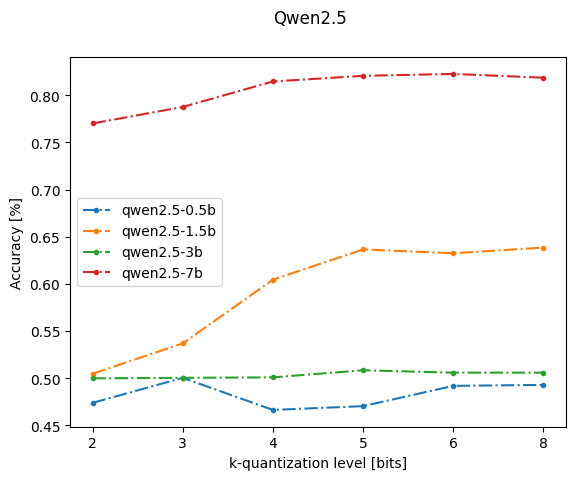

In [335]:
qwen_models = list(family_model_summaries['qwen2.5'].keys())
# sort the dictionary of bit-accuracy (key-value) pairs by the key
qwen15 = {bit: model_summaries[qwen_models[0]][bit] for bit in sorted(model_summaries[qwen_models[0]])}
qwen05 = {bit: model_summaries[qwen_models[1]][bit] for bit in sorted(model_summaries[qwen_models[1]])}
qwen30 = {bit: model_summaries[qwen_models[2]][bit] for bit in sorted(model_summaries[qwen_models[2]])}
qwen70 = {bit: model_summaries[qwen_models[3]][bit] for bit in sorted(model_summaries[qwen_models[3]])}

fig, ax = plt.subplots(1, 1) # 
ax.plot(qwen05.keys(), qwen05.values(), '.-.', label='qwen2.5-0.5b')
ax.plot(qwen15.keys(), qwen15.values(), '.-.', label='qwen2.5-1.5b')
ax.plot(qwen30.keys(), qwen30.values(), '.-.', label='qwen2.5-3b')
ax.plot(qwen70.keys(), qwen70.values(), '.-.', label='qwen2.5-7b')
ax.legend()
plt.suptitle('Qwen2.5')
ax.set_ylabel('Accuracy [%]')
ax.set_xlabel('k-quantization level [bits]')
plt.show()

In [388]:
family_model_summaries['gemma3'] # original

{'gemma3-12b': {'5': 0.85,
  '2': 0.809,
  '4': 0.8325,
  '6': 0.8485,
  '3': 0.8245,
  '8': 0.8515},
 'gemma3-1b': {'8': 0.5,
  '6': 0.5,
  '2': 0.4995,
  '3': 0.5,
  '4': 0.5,
  '5': 0.4995},
 'gemma3-4b': {'2': 0.6015,
  '4': 0.708,
  '5': 0.7225,
  '3': 0.706,
  '6': 0.7265,
  '8': 0.727}}

In [389]:
gemma1 # sorted

{'2': 0.4995, '3': 0.5, '4': 0.5, '5': 0.4995, '6': 0.5, '8': 0.5}

In [381]:
sorted(family_model_summaries['gemma3'][gemma_models[0]])

['2', '3', '4', '5', '6', '8']

In [386]:
gemma_models

['gemma3-12b', 'gemma3-1b', 'gemma3-4b']

In [398]:
family_model_summaries['biomistral'] # original

{'biomistral': {'6': 0.5481023830538394,
  '4': 0.5529753265602322,
  '2': 0.5161290322580645,
  '8': 0.5432937181663837,
  '5': 0.5364120781527532,
  '3': 0.5808124459809854}}

In [411]:
biomistral7 # sorted

{'2': 0.5161290322580645,
 '3': 0.5808124459809854,
 '4': 0.5529753265602322,
 '5': 0.5364120781527532,
 '6': 0.5481023830538394,
 '8': 0.5432937181663837}

In [410]:
family_model_summaries['llama3'] # original

{'llama3': {'6': 0.722397476340694,
  '4': 0.70541820094687,
  '3': 0.6961382113821138,
  '8': 0.7149532710280374,
  '5': 0.7243928194297783}}

In [409]:
llama3_med # sorted

{'3': 0.6961382113821138,
 '4': 0.70541820094687,
 '5': 0.7243928194297783,
 '6': 0.722397476340694,
 '8': 0.7149532710280374}

In [406]:
list(family_model_summaries['biomistral'].keys())[0]

'biomistral'

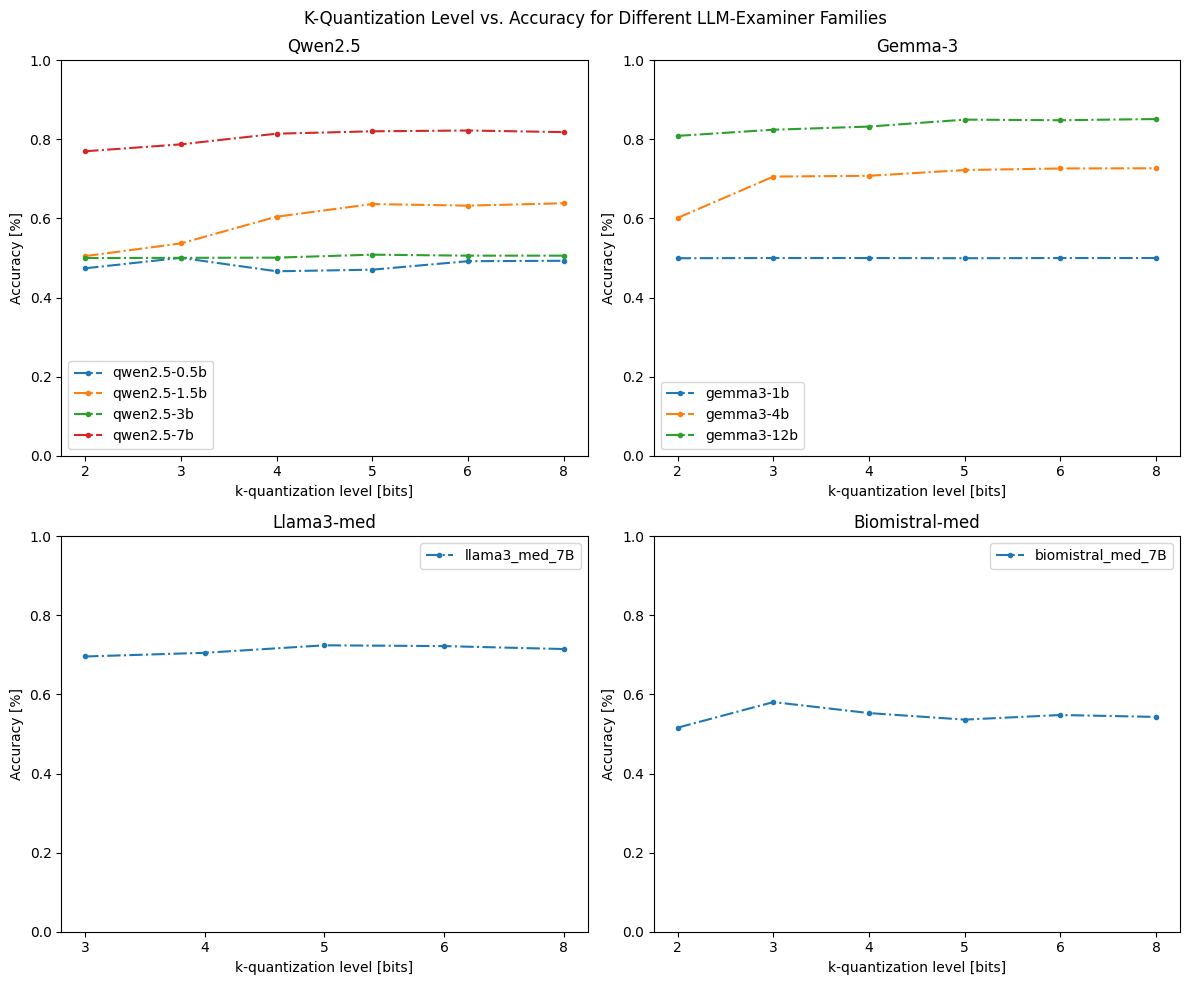

In [439]:
# --- Plot 4 families in 1 figure ---

qwen_models = list(family_model_summaries['qwen2.5'].keys()) # 1.5, 0.5, 3, 7
# sort the dictionary of bit-accuracy (key-value) pairs by the key
qwen15 = {bit: family_model_summaries['qwen2.5'][qwen_models[0]][bit] for bit in sorted(family_model_summaries['qwen2.5'][qwen_models[0]])}
qwen05 = {bit: family_model_summaries['qwen2.5'][qwen_models[1]][bit] for bit in sorted(family_model_summaries['qwen2.5'][qwen_models[1]])}
qwen30 = {bit: family_model_summaries['qwen2.5'][qwen_models[2]][bit] for bit in sorted(family_model_summaries['qwen2.5'][qwen_models[2]])}
qwen70 = {bit: family_model_summaries['qwen2.5'][qwen_models[3]][bit] for bit in sorted(family_model_summaries['qwen2.5'][qwen_models[3]])}

gemma_models = list(family_model_summaries['gemma3'].keys()) # 12, 1, 4
gemma12 = {bit: family_model_summaries['gemma3'][gemma_models[0]][bit] for bit in sorted(family_model_summaries['gemma3'][gemma_models[0]])}
gemma1 = {bit: family_model_summaries['gemma3'][gemma_models[1]][bit] for bit in sorted(family_model_summaries['gemma3'][gemma_models[1]])}
gemma4 = {bit: family_model_summaries['gemma3'][gemma_models[2]][bit] for bit in sorted(family_model_summaries['gemma3'][gemma_models[2]])}

biomistral_models = list(family_model_summaries['biomistral'].keys())
biomistral7_med = {bit: family_model_summaries['biomistral'][biomistral_models[0]][bit] for bit in sorted(family_model_summaries['biomistral'][biomistral_models[0]])}

llama3_med_models = list(family_model_summaries['llama3'].keys())
llama3_med = {bit: family_model_summaries['llama3'][llama3_med_models[0]][bit] for bit in sorted(family_model_summaries['llama3'][llama3_med_models[0]])}

fig, ax = plt.subplots(2, 2, figsize=(12,10))
# qwen
ax[0][0].plot(qwen05.keys(), qwen05.values(), '.-.', label='qwen2.5-0.5b')
ax[0][0].plot(qwen15.keys(), qwen15.values(), '.-.', label='qwen2.5-1.5b')
ax[0][0].plot(qwen30.keys(), qwen30.values(), '.-.', label='qwen2.5-3b')
ax[0][0].plot(qwen70.keys(), qwen70.values(), '.-.', label='qwen2.5-7b')
ax[0][0].legend()
ax[0][0].set_title('Qwen2.5')
ax[0][0].set_ylabel('Accuracy [%]')
ax[0][0].set_xlabel('k-quantization level [bits]')
ax[0][0].set_ylim(0, 1)

# gemma
ax[0][1].plot(gemma1.keys(), gemma1.values(), '.-.', label='gemma3-1b')
ax[0][1].plot(gemma4.keys(), gemma4.values(), '.-.', label='gemma3-4b')
ax[0][1].plot(gemma12.keys(), gemma12.values(), '.-.', label='gemma3-12b')
ax[0][1].legend()
ax[0][1].set_title('Gemma-3')
ax[0][1].set_ylabel('Accuracy [%]')
ax[0][1].set_xlabel('k-quantization level [bits]')
ax[0][1].set_ylim(0, 1)

# llama
ax[1][0].plot(llama3_med.keys(), llama3_med.values(), '.-.', label='llama3_med_7B')
ax[1][0].legend()
ax[1][0].set_title('Llama3-med')
ax[1][0].set_ylabel('Accuracy [%]')
ax[1][0].set_xlabel('k-quantization level [bits]')
ax[1][0].set_ylim(0, 1)

# biomistral
ax[1][1].plot(biomistral7_med.keys(), biomistral7_med.values(), '.-.', label='biomistral_med_7B')
ax[1][1].legend()
ax[1][1].set_title('Biomistral-med')
ax[1][1].set_ylabel('Accuracy [%]')
ax[1][1].set_xlabel('k-quantization level [bits]')
ax[1][1].set_ylim(0, 1)
plt.suptitle('K-Quantization Level vs. Accuracy for Different LLM-Examiner Families')
plt.tight_layout()
plt.show()

- generally stable or improving performance with increasing bit widths
- biomistral dips after q_3

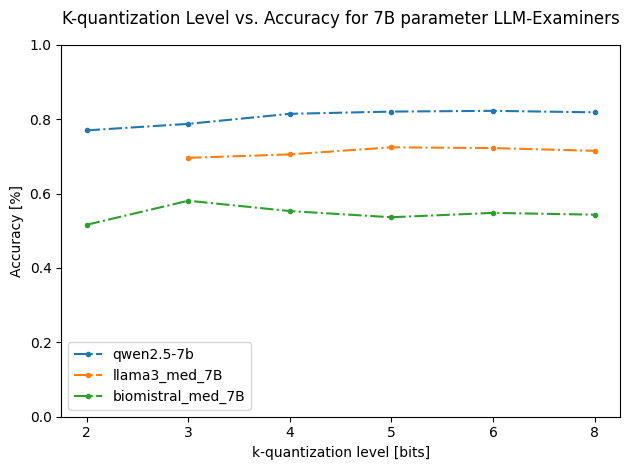

In [432]:
# --- Plot three 7B models in 1 figure ---
qwen_models = list(family_model_summaries['qwen2.5'].keys()) # 1.5, 0.5, 3, 7
# sort the dictionary of bit-accuracy (key-value) pairs by the key
qwen15 = {bit: family_model_summaries['qwen2.5'][qwen_models[0]][bit] for bit in sorted(family_model_summaries['qwen2.5'][qwen_models[0]])}
qwen05 = {bit: family_model_summaries['qwen2.5'][qwen_models[1]][bit] for bit in sorted(family_model_summaries['qwen2.5'][qwen_models[1]])}
qwen30 = {bit: family_model_summaries['qwen2.5'][qwen_models[2]][bit] for bit in sorted(family_model_summaries['qwen2.5'][qwen_models[2]])}
qwen70 = {bit: family_model_summaries['qwen2.5'][qwen_models[3]][bit] for bit in sorted(family_model_summaries['qwen2.5'][qwen_models[3]])}

gemma_models = list(family_model_summaries['gemma3'].keys()) # 12, 1, 4
gemma12 = {bit: family_model_summaries['gemma3'][gemma_models[0]][bit] for bit in sorted(family_model_summaries['gemma3'][gemma_models[0]])}
gemma1 = {bit: family_model_summaries['gemma3'][gemma_models[1]][bit] for bit in sorted(family_model_summaries['gemma3'][gemma_models[1]])}
gemma4 = {bit: family_model_summaries['gemma3'][gemma_models[2]][bit] for bit in sorted(family_model_summaries['gemma3'][gemma_models[2]])}

biomistral_models = list(family_model_summaries['biomistral'].keys())
biomistral7_med = {bit: family_model_summaries['biomistral'][biomistral_models[0]][bit] for bit in sorted(family_model_summaries['biomistral'][biomistral_models[0]])}

llama3_med_models = list(family_model_summaries['llama3'].keys())
llama3_med = {bit: family_model_summaries['llama3'][llama3_med_models[0]][bit] for bit in sorted(family_model_summaries['llama3'][llama3_med_models[0]])}

fig, ax = plt.subplots(1, 1)#, figsize=(12,10))
# qwen
ax.plot(qwen70.keys(), qwen70.values(), '.-.', label='qwen2.5-7b')
ax.plot(llama3_med.keys(), llama3_med.values(), '.-.', label='llama3_med_7B')
ax.plot(biomistral7_med.keys(), biomistral7_med.values(), '.-.', label='biomistral_med_7B')
ax.legend()
#ax[0][0].set_title('Qwen2.5')
ax.set_ylabel('Accuracy [%]')
ax.set_xlabel('k-quantization level [bits]')
ax.set_ylim(0, 1)
#plt.suptitle('')
plt.title('K-quantization Level vs. Accuracy for 7B parameter LLM-Examiners',pad=15)
plt.tight_layout()
plt.show()

- missing datapoint for llama3_med_7B 2b quant
- general model performs better than its fine-tuned counterparts ; qualifier: this is only w.r.t accuracy, and also in the experimental setting where relevant contextual knowledge is included within the prompt.
- gemma is excluded from this plot to allow for direct comparison between 7B parameter models; gemma3 lineup does not have a 7B parameter model
- nevertheless, what's more important is GPU usage ; if gemma 12B requires about the same GPU as qwen7B, then it makes sense to include gemma 12B too since the system tradeoff is equivalent

In [440]:
family_model_summaries

{'biomistral': {'biomistral': {'6': 0.5481023830538394,
   '4': 0.5529753265602322,
   '2': 0.5161290322580645,
   '8': 0.5432937181663837,
   '5': 0.5364120781527532,
   '3': 0.5808124459809854}},
 'llama3': {'llama3': {'6': 0.722397476340694,
   '4': 0.70541820094687,
   '3': 0.6961382113821138,
   '8': 0.7149532710280374,
   '5': 0.7243928194297783}},
 'gemma3': {'gemma3-12b': {'5': 0.85,
   '2': 0.809,
   '4': 0.8325,
   '6': 0.8485,
   '3': 0.8245,
   '8': 0.8515},
  'gemma3-1b': {'8': 0.5,
   '6': 0.5,
   '2': 0.4995,
   '3': 0.5,
   '4': 0.5,
   '5': 0.4995},
  'gemma3-4b': {'2': 0.6015,
   '4': 0.708,
   '5': 0.7225,
   '3': 0.706,
   '6': 0.7265,
   '8': 0.727}},
 'qwen2.5': {'Qwen2.5-1.5b': {'3': 0.537,
   '4': 0.6045,
   '5': 0.6365,
   '8': 0.6385,
   '2': 0.5047974413646056,
   '6': 0.6325},
  'Qwen2.5-0.5b': {'5': 0.4705,
   '2': 0.474,
   '6': 0.492,
   '3': 0.5005,
   '4': 0.4665,
   '8': 0.493},
  'Qwen2.5-3b': {'5': 0.5085,
   '2': 0.5,
   '4': 0.501,
   '6': 0.506,
 

In [360]:
sorted(model_summaries[qwen_models[0]]) # should just be the different bit levels

['2', '3', '4', '5', '6', '8']

In [369]:
sorted(family_model_summaries['gemma3'][gemma_models[0]])

['2', '3', '4', '5', '6', '8']

In [365]:
gemma_models = list(family_model_summaries['gemma3'].keys())
gemma1 = {bit: family_model_summaries['gemma3'][gemma_models[0]][bit] for bit in sorted(family_model_summaries['gemma3'][gemma_models[0]])}

In [366]:
gemma1

{'2': 0.809, '3': 0.8245, '4': 0.8325, '5': 0.85, '6': 0.8485, '8': 0.8515}

In [359]:
sorted(family_model_summaries['gemma3'])

['gemma3-12b', 'gemma3-1b', 'gemma3-4b']

In [358]:
gemma1

{'gemma3-12b': {'5': 0.85,
  '2': 0.809,
  '4': 0.8325,
  '6': 0.8485,
  '3': 0.8245,
  '8': 0.8515},
 'gemma3-1b': {'5': 0.85,
  '2': 0.809,
  '4': 0.8325,
  '6': 0.8485,
  '3': 0.8245,
  '8': 0.8515},
 'gemma3-4b': {'5': 0.85,
  '2': 0.809,
  '4': 0.8325,
  '6': 0.8485,
  '3': 0.8245,
  '8': 0.8515}}

In [263]:
# sorted a dict
{bit: model_summaries[qwen_models[0]][bit] for bit in sorted(model_summaries[qwen_models[0]])}

{'2': 0.5047974413646056,
 '3': 0.537,
 '4': 0.6045,
 '5': 0.6365,
 '6': 0.6325,
 '8': 0.6385}